In [242]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings

from nltk.corpus import stopwords
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.preprocessing import OrdinalEncoder
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

warnings.filterwarnings("ignore")

Custom functions

In [199]:
#1 Remove stop words from text
def remove_stops(text, filler=''):
    return filler.join([word.title() for word in str(text).lower().split() if word not in stopwords.words('english')])

#2 Plot function for value counts
def value_count_plots(dfs, columns, labels=[], size=[10, 10], ncols=3):

    if len(columns) % ncols != 0:
        nrows = len(columns) // ncols + 1
    else:
        nrows = len(columns) // ncols

    idx = 1
    plt.figure(figsize= size, layout='tight')   
    for col in columns:
        if idx == 3:
            ax.set_title('Value counts for object types')
        ax = plt.subplot(nrows, ncols, idx)
        if type(dfs) == list:
            for df, align, label in zip(dfs, ['edge', 'center'], labels):   # can best accomodate 2
                ax.barh(df[col].value_counts(normalize= True).index, 
                        df[col].value_counts(normalize= True).values, 
                        label=label, align=align)
                ax.set_xlabel(col)
        else:
            ax.barh(dfs[col].value_counts(normalize= True).index, 
            dfs[col].value_counts(normalize= True).values)
            ax.set_xlabel(col)
        idx += 1
        plt.legend()
    plt.show()

#4 Plot function for histogram
def histogram_plots(dfs, columns, labels=[], size=[10, 10], ncols=3):

    if len(columns) % ncols != 0:
        nrows = len(columns) // ncols + 1
    else:
        nrows = len(columns) // ncols

    idx = 1
    plt.figure(figsize= size, layout='tight')
    for col in columns:
        if idx == 3:
            ax.set_title('Histogram for numeric types')
        ax = plt.subplot(nrows, ncols, idx)
        if type(dfs) == list:
            for df, align, label in zip(dfs, ['left', 'right'], labels):
                ax.hist(df[col], align= align, label= label, density= True)
                ax.set_xlabel(col)
        else:
            ax.hist(df[col], density= True)
            ax.set_xlabel(col)
        idx += 1
        plt.legend()
    plt.show()

#5  Plot function for boxplots
def box_plots(df, num_cols, cat_cols, size=[10, 10]):
    nrows = len(cat_cols)
    ncols = len(num_cols)
    idx = 1
    plt.figure(figsize= size, layout='tight')
    for row in cat_cols:
        for col in num_cols:
            ax = plt.subplot(nrows, ncols, idx)
            ax.boxplot([df[df[row]==val][col] for val in df[row].unique()])
            ax.set_xticks(np.arange(df[row].unique().size), df[row].unique())
            ax.set_xlabel(col)
            ax.set_ylabel(row)
            idx += 1
    plt.show()

#6 Store null columns in a dataframe
def fetch_nulls(df):
    nulls = df.isnull().sum()
    condition = df.isnull().sum() > 0

    df_nulls = pd.concat([df[nulls[condition].index].dtypes, (nulls[condition] / len(df) * 100).round(2)], axis=1).reset_index()
    df_nulls.columns = ['Column_name', 'dtype', 'percent_nulls']
    df_nulls.sort_values(by= 'percent_nulls', ascending= False)
    return df_nulls

## Load Data

In [200]:
ls = pd.read_csv("Leads.csv")
ls.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [201]:
ls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

Shortening column names by removing stopwords and other chosen words

In [202]:
ls.columns = [remove_stops(text, '_') for text in ls.columns]

In [203]:
# Segregating columns as per dtypes
cat_cols = ls.columns[ls.dtypes == 'O']
num_cols = ls.columns[ls.dtypes != 'O']
num_cols = num_cols.drop('Lead_Number')

print(f'Category columns = {len(cat_cols)}')
print(f'Numeric columns = {len(num_cols)}')

Category columns = 30
Numeric columns = 6


Dataset has 9240 records

Prospect ID is an object type unique key for all records, but so is Lead Number which is an integer type. Hence Prospect ID is dropped and Lead Number can be used as unique key of each record

In [204]:
ls.drop(columns=['Prospect_Id'], inplace= True)
cat_cols = cat_cols.drop('Prospect_Id')

Shortening values of object type columns with long names

In [205]:
long_vals = ['Tags', 'Last_Activity', 'Lead_Quality', 'Last_Notable_Activity']
for col in long_vals:
    ls.loc[~ls[col].isnull(), col] = ls[~ls[col].isnull()][col].apply(lambda x: remove_stops(x, ' '))

In [206]:
ls['Tags']

0         Interested Courses
1                    Ringing
2       Revert Reading Email
3                    Ringing
4       Revert Reading Email
                ...         
9235    Revert Reading Email
9236      Wrong Number Given
9237          Invalid Number
9238                     NaN
9239    Revert Reading Email
Name: Tags, Length: 9240, dtype: object

Percent null values

In [207]:
nulls = fetch_nulls(ls)
nulls

,Column_name,dtype,percent_nulls
0,Lead_Source,object,0.39
1,Totalvisits,float64,1.48
2,Page_Views_Per_Visit,float64,1.48
3,Last_Activity,object,1.11
4,Country,object,26.63
5,Specialization,object,15.56
6,Hear_X_Education,object,23.89
7,Current_Occupation,object,29.11
8,Matters_Choosing_Course,object,29.32
9,Tags,object,36.29


## Missing value treatment

Plotting value counts for object type columns with null values

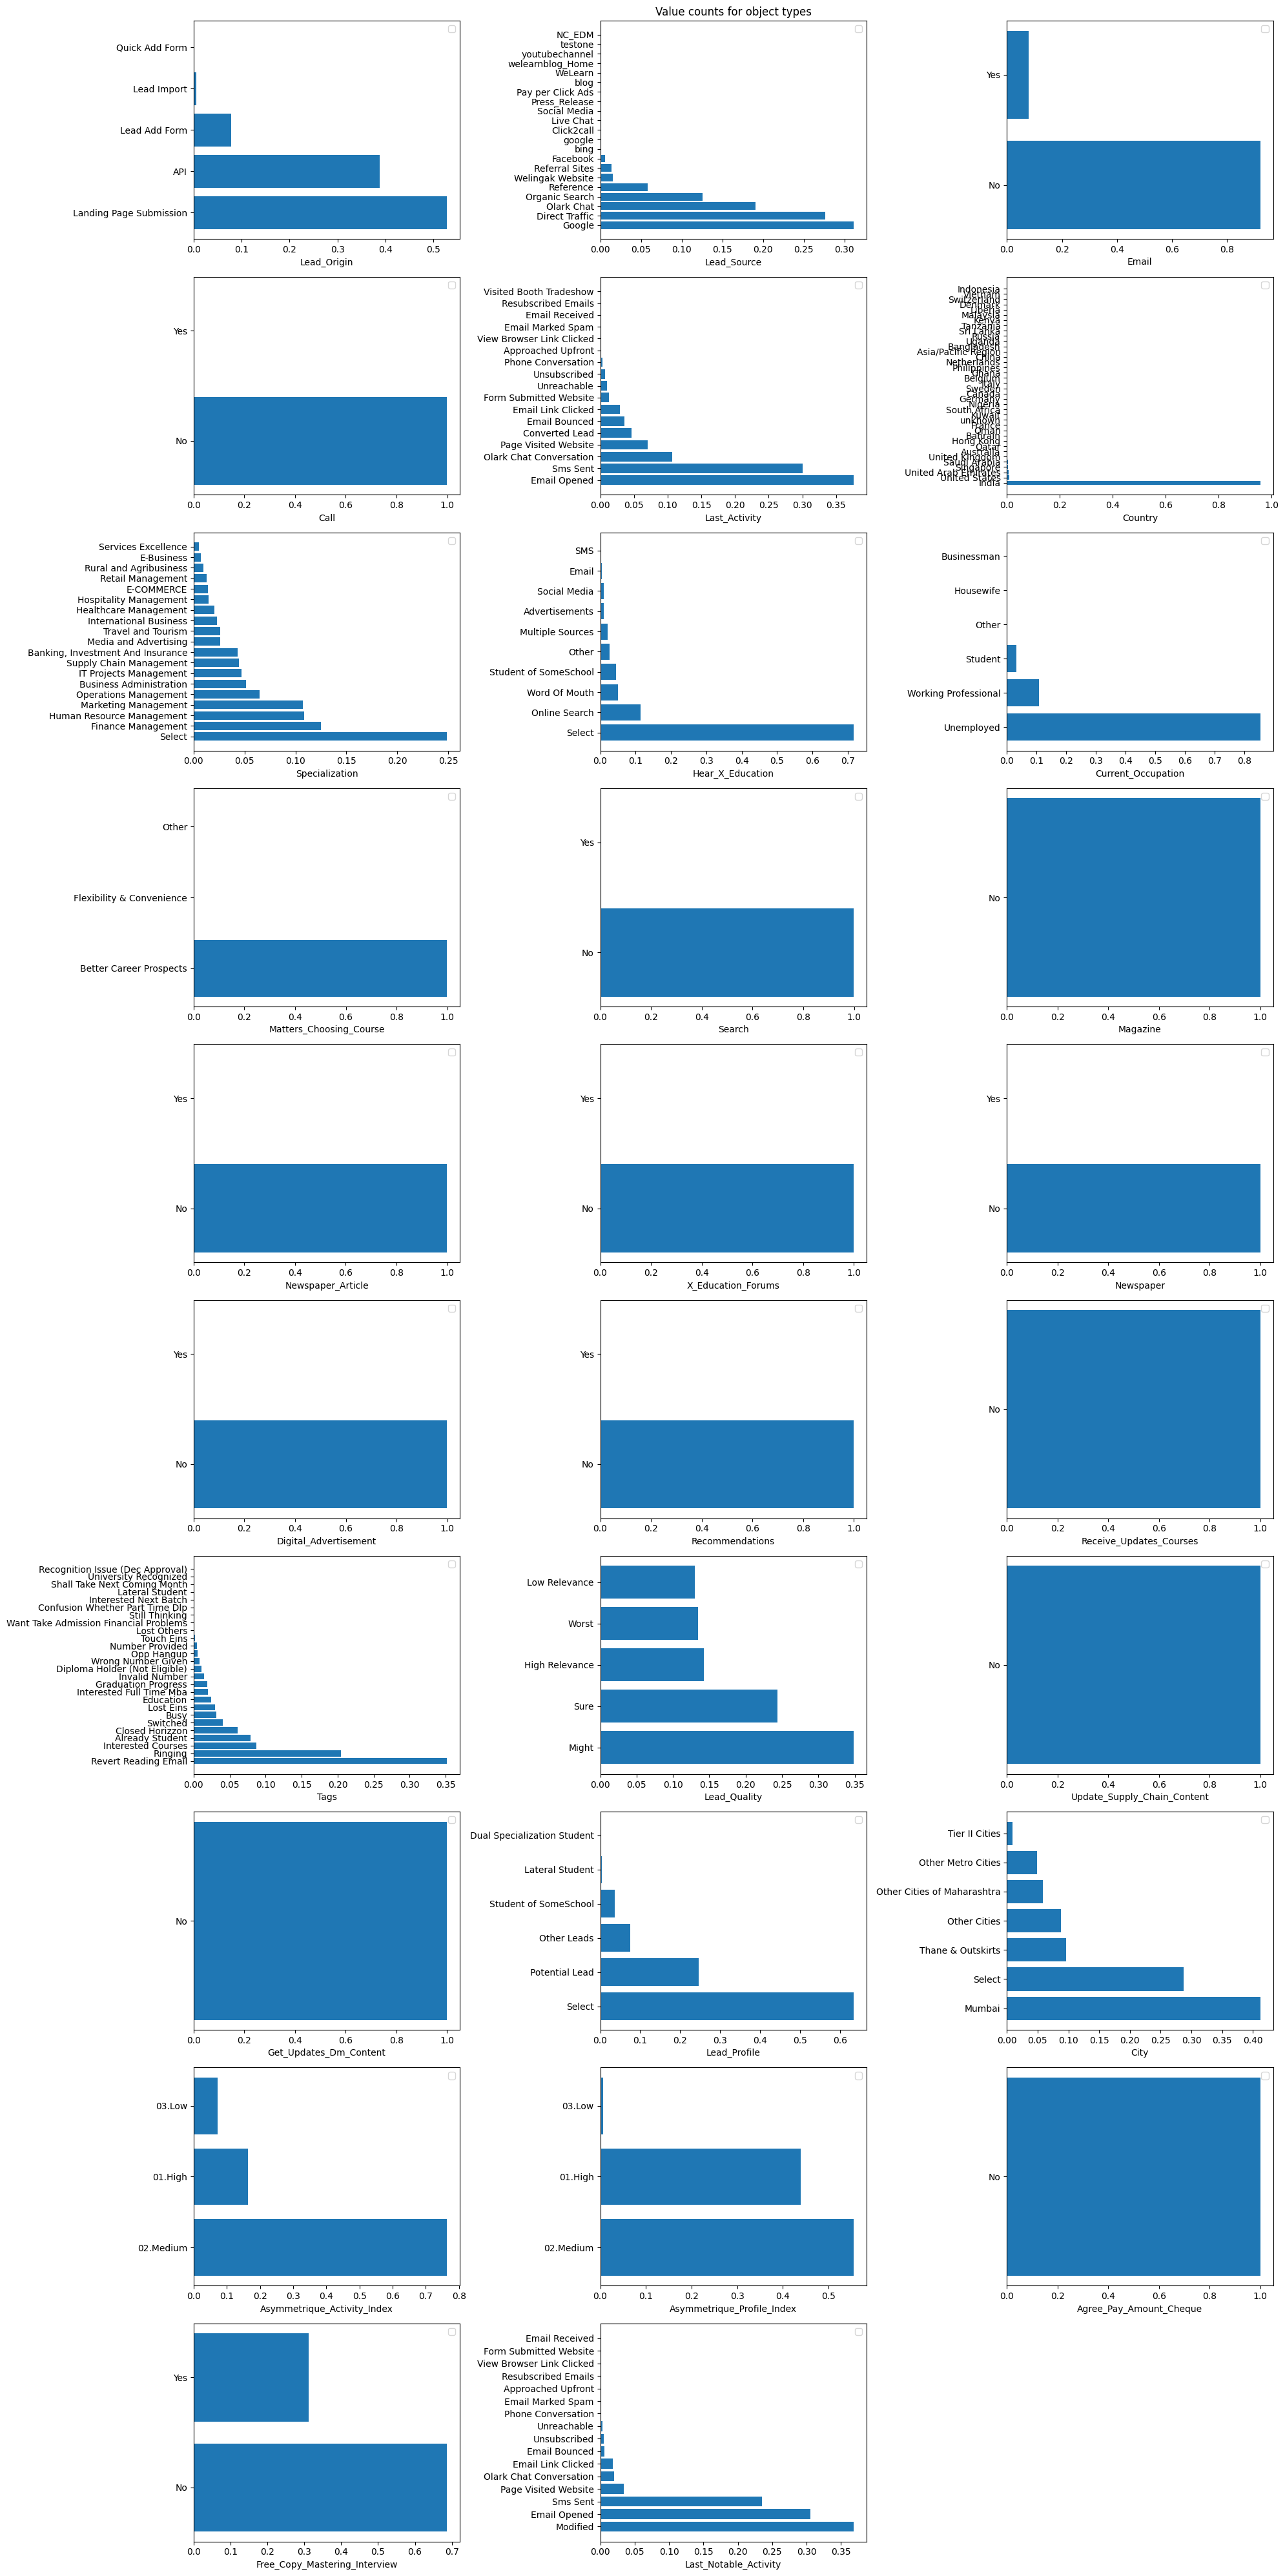

In [208]:
value_count_plots(ls, cat_cols, size=(20, 40))

Columns that can be dropped
1. Matters_Choosing_Course: skewed distribution with 29% missing values
2. Country: skewedd distribution with 26% missing values

Other observations: Asymmetric indices have to changed to Low, Medium, High only

In [209]:
ls.drop(columns=['Matters_Choosing_Course', 'Country'], inplace=True)
cat_cols = cat_cols.drop(['Matters_Choosing_Course', 'Country'])

Lead_Quality

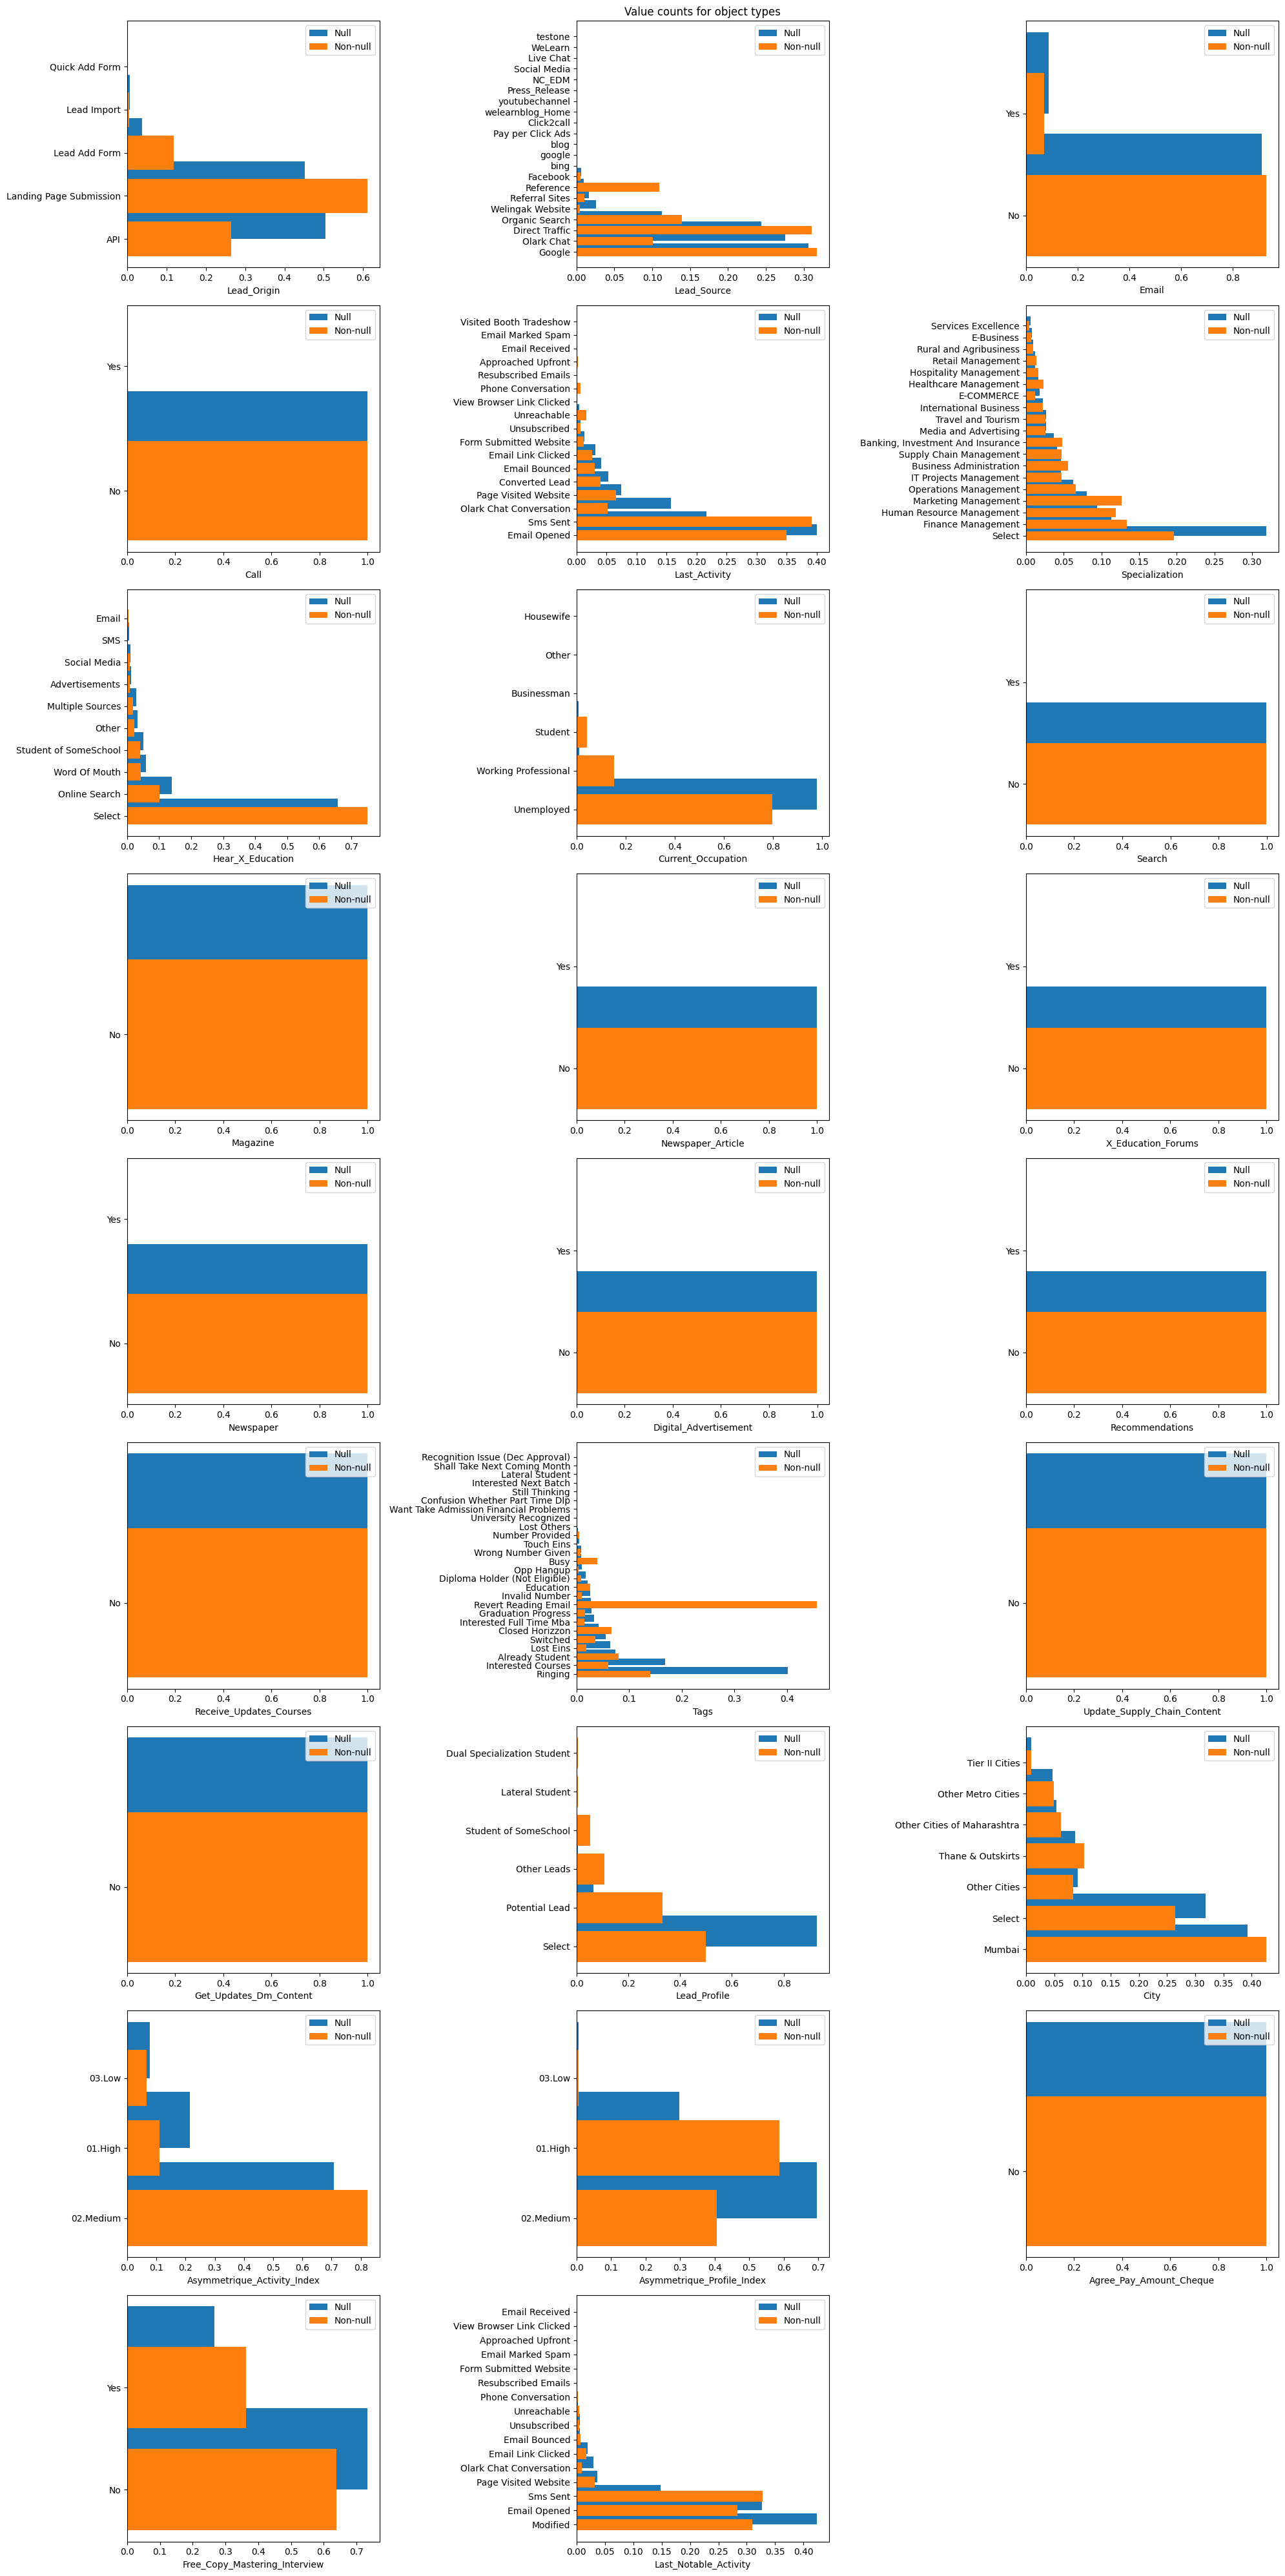

In [210]:
# comparitive value count plot of object columns for nulls and non nulls of Lead_Quality
df1 = ls[ls.Lead_Quality.isnull()]
df2 = ls[~ls.Lead_Quality.isnull()]

value_count_plots([df1, df2], cat_cols.drop('Lead_Quality'), ['Null', 'Non-null'], [20, 40])

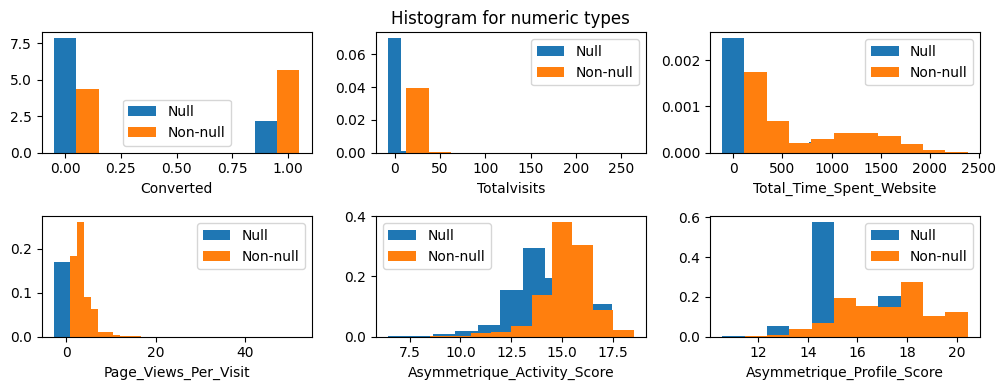

In [211]:
df1 = ls[ls.Lead_Quality.isnull()]
df2 = ls[~ls.Lead_Quality.isnull()]

histogram_plots([df1, df2], num_cols, ['Null', 'Non-null'], [10, 4])

In [212]:
(ls[ls['Lead_Quality'].isna()].isnull().sum() / len(ls) * 100).round(2)

Lead_Number                       0.00
Lead_Origin                       0.00
Lead_Source                       0.15
Email                             0.00
Call                              0.00
Converted                         0.00
Totalvisits                       0.41
Total_Time_Spent_Website          0.00
Page_Views_Per_Visit              0.41
Last_Activity                     0.27
Specialization                   15.56
Hear_X_Education                 23.89
Current_Occupation               29.11
Search                            0.00
Magazine                          0.00
Newspaper_Article                 0.00
X_Education_Forums                0.00
Newspaper                         0.00
Digital_Advertisement             0.00
Recommendations                   0.00
Receive_Updates_Courses           0.00
Tags                             36.00
Lead_Quality                     51.59
Update_Supply_Chain_Content       0.00
Get_Updates_Dm_Content            0.00
Lead_Profile             

There are no appreciable difference in patterns between null and non-null Lead_Quality. Most null values in other features are also covered in the missing values of Lead_Quality. Hence rows having missing values are dropped. Training models with this feature will incorporate human intuition factor.

In [213]:
ls = ls[~ls['Lead_Quality'].isna()]
fetch_nulls(ls)

,Column_name,dtype,percent_nulls
0,Lead_Source,object,0.49
1,Totalvisits,float64,2.21
2,Page_Views_Per_Visit,float64,2.21
3,Last_Activity,object,1.74
4,Tags,object,0.60
5,Asymmetrique_Activity_Index,object,45.25
6,Asymmetrique_Profile_Index,object,45.25
7,Asymmetrique_Activity_Score,float64,45.25
8,Asymmetrique_Profile_Score,float64,45.25


Asymmetrique columns

In [214]:
asm_cols = [col for col in ls.columns if 'asymmetrique' in col.lower().split('_')]
asm_idx = np.array([ls[ls[col].isnull()].index for col in asm_cols])

In [215]:
# Missing values of Asymmetrique columns have the same indices
for i in asm_idx[1:]:
    print(np.all(asm_idx[0] == i))

True
True
True


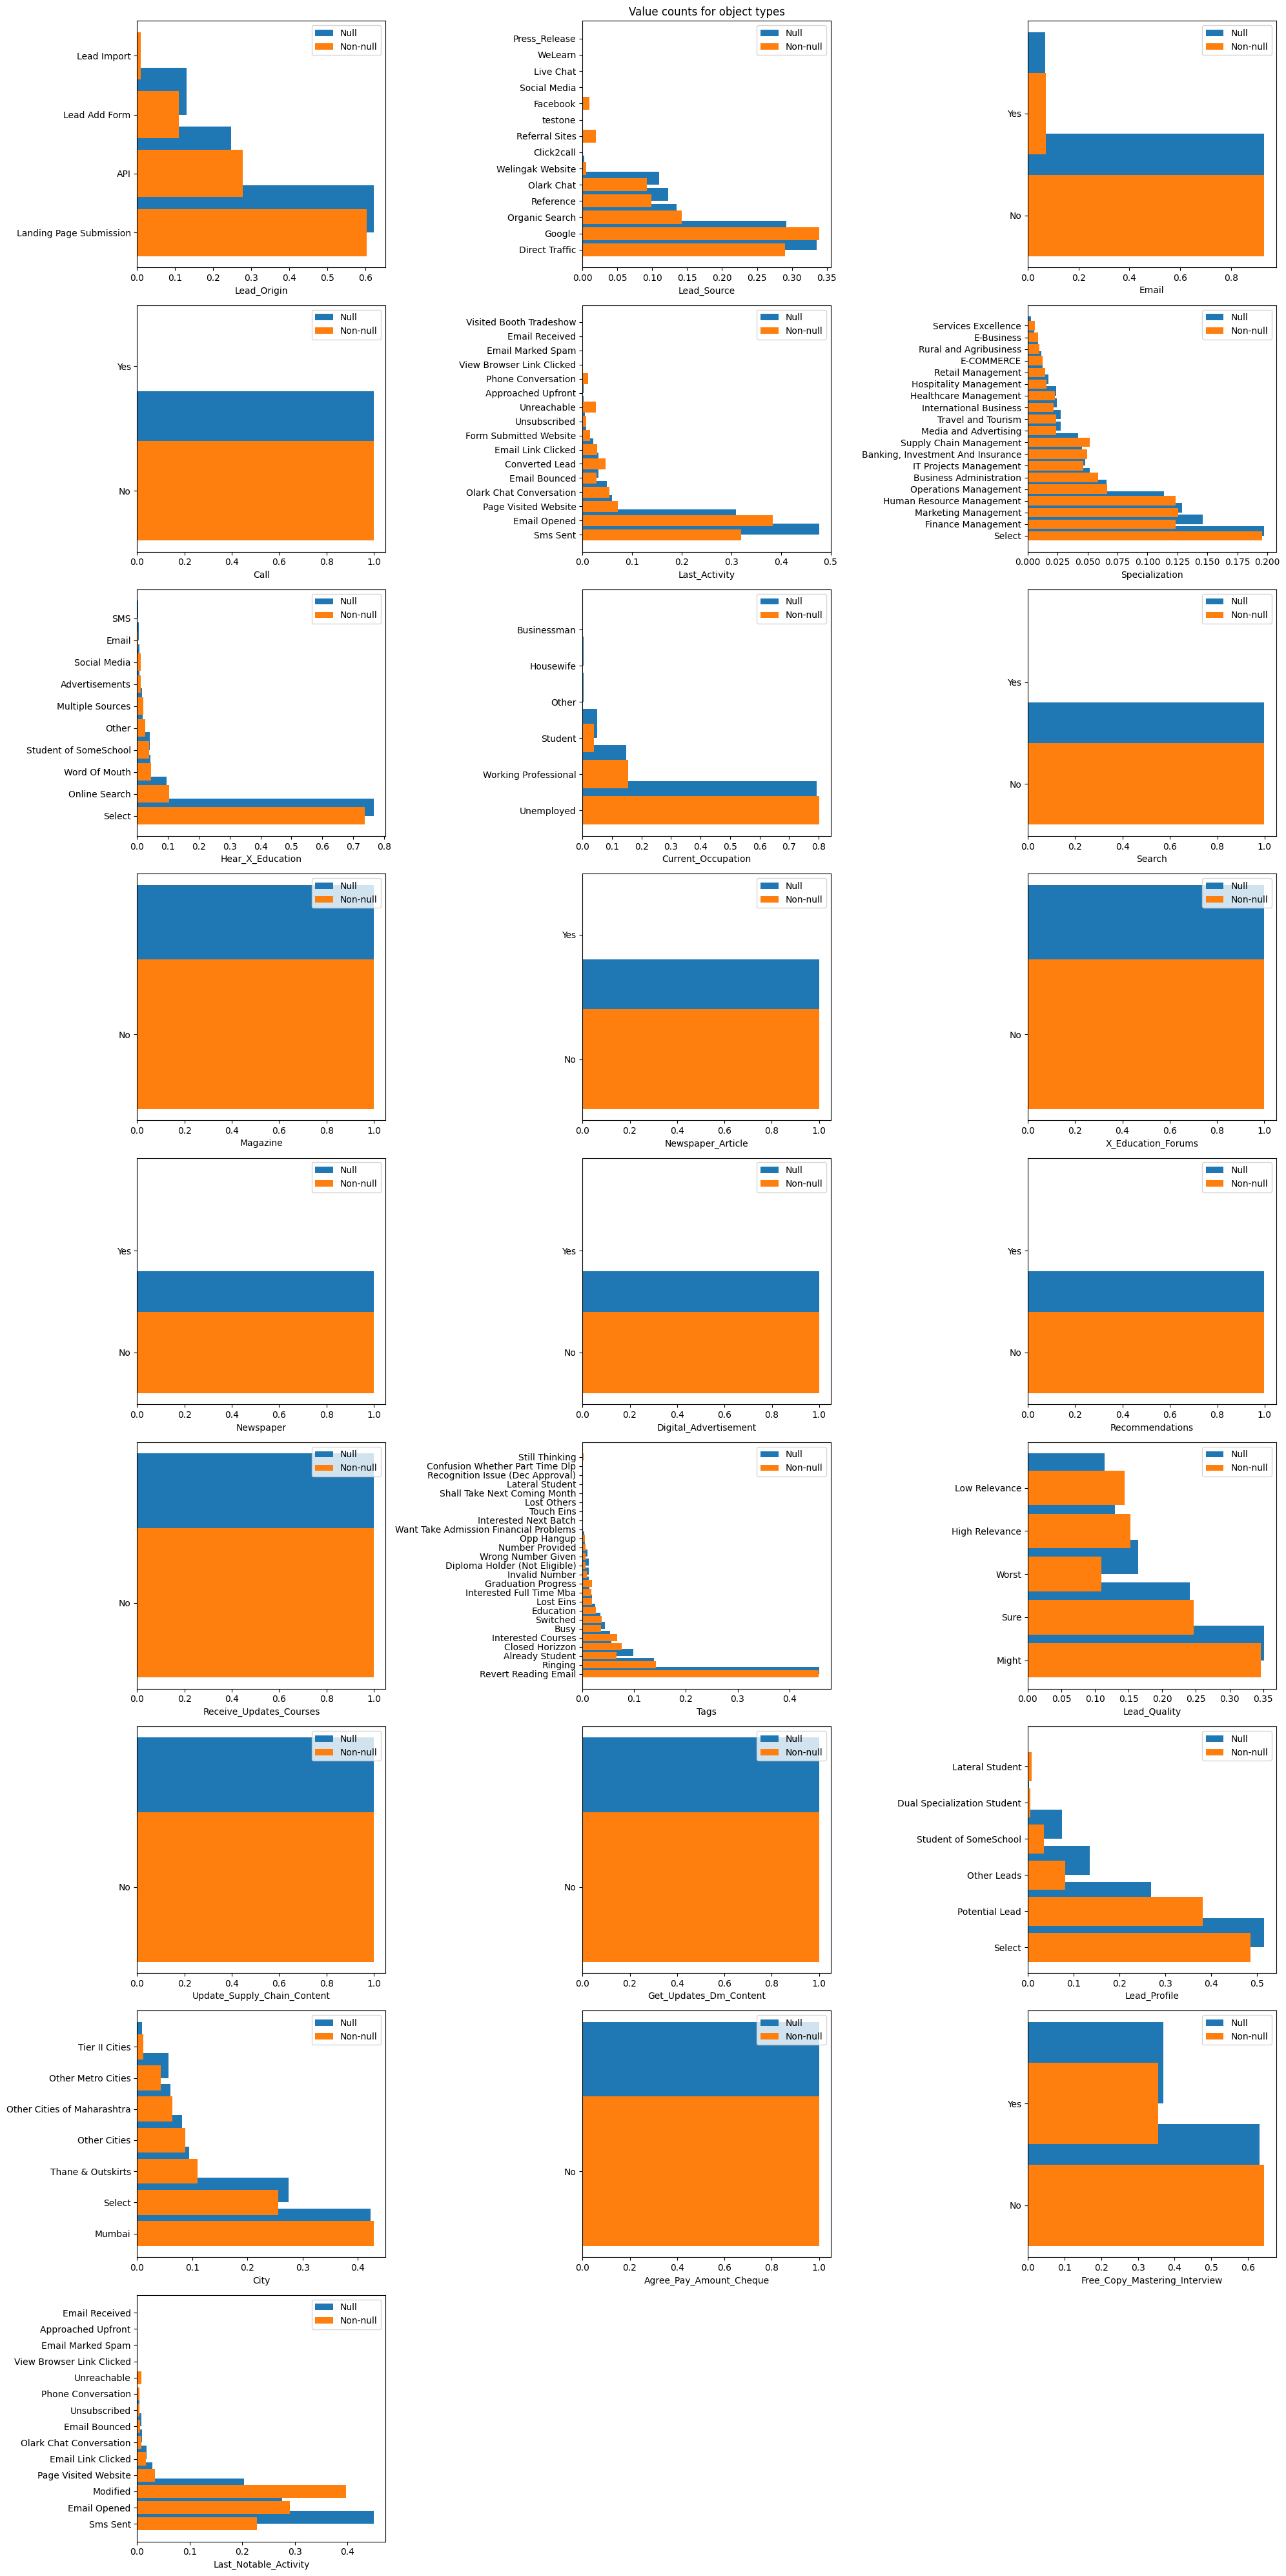

In [216]:
# comparitive value count plot of object columns for nulls and non nulls of Lead_Quality
df1 = ls[ls.Asymmetrique_Profile_Index.isnull()]
df2 = ls[~ls.Asymmetrique_Profile_Index.isnull()]

value_count_plots([df1, df2], cat_cols.drop(['Asymmetrique_Profile_Index', 'Asymmetrique_Activity_Index']), ['Null', 'Non-null'], [20, 40])

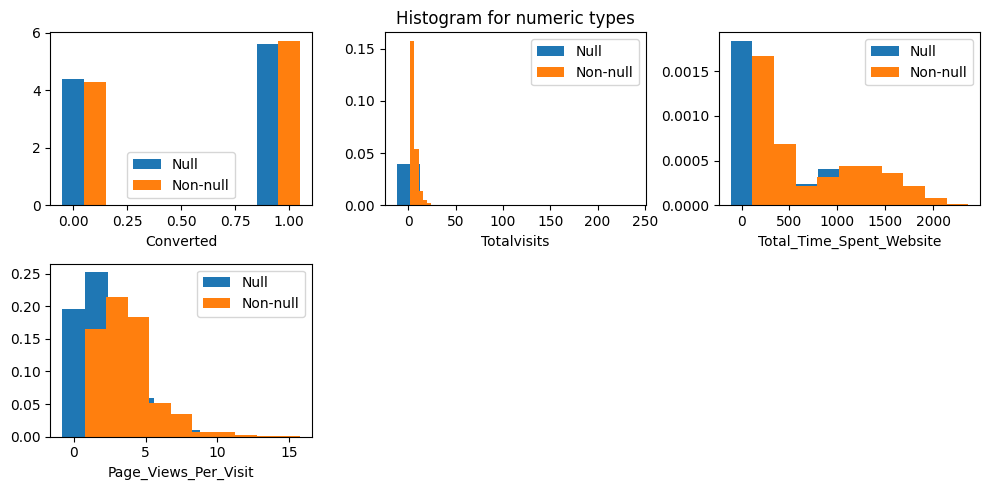

In [217]:
# comparitive histogram plot of numeric columns for nulls and non nulls of Lead_Quality
df1 = ls[ls.Asymmetrique_Profile_Index.isnull()]
df2 = ls[~ls.Asymmetrique_Profile_Index.isnull()]

histogram_plots([df1, df2], num_cols.drop(['Asymmetrique_Profile_Score', 'Asymmetrique_Activity_Score']), ['Null', 'Non-null'], [10, 5])

There are no appreciable patterns discernable between null and non-null values of asymmetric columns. Since these columns values are based on activity and profile data already in the dataset, it may be correlated with other features. Hence these columns are dropped

In [218]:
asm_cols

['Asymmetrique_Activity_Index',
 'Asymmetrique_Profile_Index',
 'Asymmetrique_Activity_Score',
 'Asymmetrique_Profile_Score']

In [219]:
ls.drop(columns= asm_cols, inplace= True)
cat_cols = cat_cols.drop([col for col in asm_cols if 'Index' in col])
num_cols = num_cols.drop([col for col in asm_cols if 'Score' in col])
nulls = fetch_nulls(ls)
nulls

,Column_name,dtype,percent_nulls
0,Lead_Source,object,0.49
1,Totalvisits,float64,2.21
2,Page_Views_Per_Visit,float64,2.21
3,Last_Activity,object,1.74
4,Tags,object,0.60


The rest of the values can be imputed with their respective medians for numeric and mode for category columns

In [220]:
cols = nulls[nulls.dtype == 'O'].Column_name
for col in cols:
    ls[col].fillna(ls[col].mode()[0], inplace= True)

cols = nulls[nulls.dtype != 'O'].Column_name
for col in cols:
    ls[col].fillna(ls[col].median(), inplace= True)

In [221]:
fetch_nulls(ls)

,Column_name,dtype,percent_nulls


In [222]:
ls.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4473 entries, 0 to 9239
Data columns (total 30 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Lead_Number                    4473 non-null   int64  
 1   Lead_Origin                    4473 non-null   object 
 2   Lead_Source                    4473 non-null   object 
 3   Email                          4473 non-null   object 
 4   Call                           4473 non-null   object 
 5   Converted                      4473 non-null   int64  
 6   Totalvisits                    4473 non-null   float64
 7   Total_Time_Spent_Website       4473 non-null   int64  
 8   Page_Views_Per_Visit           4473 non-null   float64
 9   Last_Activity                  4473 non-null   object 
 10  Specialization                 4473 non-null   object 
 11  Hear_X_Education               4473 non-null   object 
 12  Current_Occupation             4473 non-null   object

## Univariate analysis

Decision Tree for checking dependency of Lead Quality on other features

In [223]:
encoder = OrdinalEncoder()
ls_LeadQual = ls.copy()
ls_LeadQual[cat_cols] = encoder.fit_transform(ls[cat_cols])
ls_LeadQual.head()

,Lead_Number,Lead_Origin,Lead_Source,Email,Call,Converted,Totalvisits,Total_Time_Spent_Website,Page_Views_Per_Visit,Last_Activity,...,Receive_Updates_Courses,Tags,Lead_Quality,Update_Supply_Chain_Content,Get_Updates_Dm_Content,Lead_Profile,City,Agree_Pay_Amount_Cheque,Free_Copy_Mastering_Interview,Last_Notable_Activity
0,660737,0.0,5.0,0.0,0.0,0,0.0,0,0.0,9.0,...,0.0,7.0,1.0,0.0,0.0,4.0,4.0,0.0,0.0,6.0
2,660727,1.0,1.0,0.0,0.0,1,2.0,1532,2.0,5.0,...,0.0,17.0,2.0,0.0,0.0,3.0,0.0,0.0,1.0,4.0
3,660719,1.0,1.0,0.0,0.0,0,1.0,305,1.0,12.0,...,0.0,18.0,3.0,0.0,0.0,4.0,0.0,0.0,0.0,6.0
4,660681,1.0,3.0,0.0,0.0,1,2.0,1428,1.0,1.0,...,0.0,17.0,2.0,0.0,0.0,4.0,0.0,0.0,0.0,6.0
6,660673,1.0,3.0,0.0,0.0,1,2.0,1640,2.0,5.0,...,0.0,17.0,1.0,0.0,0.0,3.0,0.0,0.0,0.0,6.0


In [260]:
X = ls_LeadQual.drop(columns=['Lead_Number', 'Lead_Quality'])
y = ls_LeadQual['Lead_Quality']
classes = ls['Lead_Quality'].unique().tolist()

dt = DecisionTreeClassifier(max_depth= 10)
dt.fit(X, y)

y_pred = dt.predict(X)
print(accuracy_score(y, y_pred))

pd.DataFrame(confusion_matrix(y, y_pred), columns= classes, index= classes)

0.7513972725240331


,Low Relevance,Might,Sure,Worst,High Relevance
Low Relevance,450,116,60,6,5
Might,90,387,62,16,28
Sure,82,83,1117,240,38
Worst,7,23,107,886,69
High Relevance,2,5,4,69,521


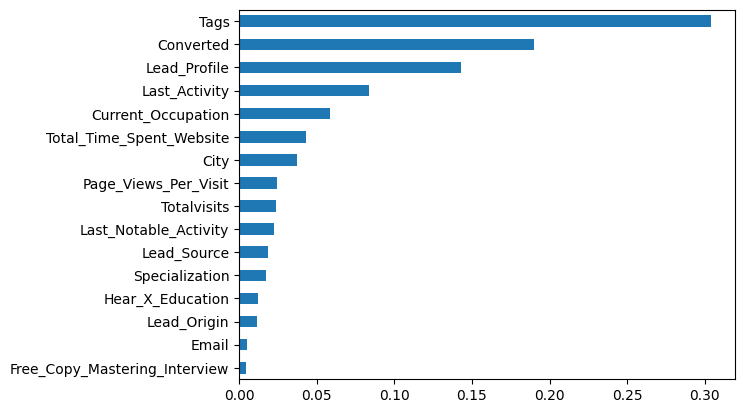

In [261]:
# Features on which Lead_Quality depends
dt_features = pd.Series(dt.feature_importances_, index= X.columns)
dt_features[dt_features != 0].sort_values().plot.barh()
plt.show()